## **Projeto de Visualização da Informação**

##### **Nome**: Edson Rodrigues Ajeje
##### **RGM**: 31995519
##### **Instituição**: Universidade Cruzeiro do Sul
##### **Curso**: Ciência da Computação

##### **Link do dataset utilizado**:
https://www.kaggle.com/competitions/fake-news/overview

##### **Link do vídeo de apresentação**:

### Primeira Visualização

**Núvem de palavras com os títulos das notícias**

In [ ]:
# Caso ainda não tenha instado as bibliotecas pode utilizar os comandos abaixo
# !pip install WordCloud
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install PIL
# !pip install nltk

In [1]:
# importar os pacotes necessários
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize

In [2]:
# importar o arquivo csv em um df
df = pd.read_csv('DataSets/train.csv', low_memory = False)

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [3]:
# eliminar as colunas com valores ausentes e utilizar somente a coluna title
titles = df.dropna(subset=['title'], axis=0)['title']

# exemplos de descrições para os imóveis no Airbnb
print(titles.iloc[100])

American Drivers Regain Appetite for Gas Guzzlers - The New York Times


In [4]:
# lista de stopword
nltk.download('stopwords')
nltk_stopwords.words('english')

stop_words = set(nltk_stopwords.words('english'))

# concatenar as palavras
titles_on_string = " ".join(s for s in titles)

# tokenizando o set
tokens = word_tokenize(titles_on_string)

# removendo stopwords no set
filtered_titles = [w for w in tokens if not w.lower() in stop_words]


[nltk_data] Downloading package stopwords to /home/edson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


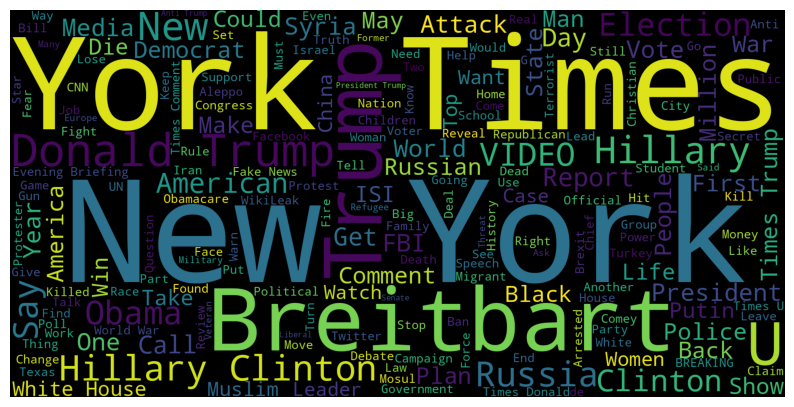

In [5]:
# Gerando a WordCloud
wordcloud = WordCloud(stopwords=nltk_stopwords.words('english'),
                      background_color="black",
                      width=1600, height=800).generate(titles_on_string)

# Mostrar a imagem final da WordCloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

**Lista de 14 palavras com maior importância segundo a núvem de palavras**

- York Times
- New York
- Breitbart
- Trump
- Donald Trump
- Hillary
- Obama
- Clinton
- Election
- Russia
- American
- Putin
- Video
- Syria

Após análise da lista, pode-se reduzir agrupando termos semelhantes em significado, como nomes próprios, por exemplo. A lista resultante terá 11 entradas:

- (New) York Times
- New York
- Breitbart
- Trump / Donald Trump
- Hillary / Hillary Clinton
- Obama
- Election
- Russia / Putin
- American
- Video
- Syria

Com base nessa lista, é possível fazer uma nova visualização, filtrando a base de dados original por aquelas que apresentam pelo menos uma das palavras da lista na coluna "titles", e a partir desse novo dataset, gerar novas visualizações.

### Segunda Visualização

**Número de fake news com cada uma das palavras chaves da núvem de palavras**

In [6]:
# definindo a lista de palavras que serão buscadas
words = ['New York Times', 'York Times', 'New York', 'Breitbart', 'Trump', 'Donald Trump', 'Hillary', 'Hillary Clinton', 'Clinton', 'Obama', 'Election', 'Russia', 'Putin', 'American', 'Video', 'Syria']

In [7]:
# filtrando o dataset para apresentar somente as colunas necessárias
titles_filtered_df = df.iloc[:, [1,4]]

In [14]:
# Definindo a função que encontra os termos presentes na string
def hasSubstrings(title, terms):
    matching_terms = [term for term in terms if term in title]
    return matching_terms

# Verificar se o valor é uma string antes de aplicar a função e criar uma nova coluna com os valores retornados
titles_filtered_df['words'] = titles_filtered_df['title'].apply(lambda x: hasSubstrings(x, words) if isinstance(x, str) else [])

In [ ]:
# Definindo a função de para filtro de array vazio
def hasWords(x):
    return len(x) > 0

# Removendo do dataset as linhas que não possuem termos setados na coluna words
titles_filtered_df = titles_filtered_df[titles_filtered_df['words'].apply(lambda x: hasWords(x))]

# Visualizando as primeiras linhas do DataFrame
titles_filtered_df.head()

In [ ]:
# preparando o dataset de visualização

# criando o dicionário que será usando na visualização
words_dict = []
for w in words:
    words_dict.append({ w: { 'true': 0, 'false': 0 }})

# verificando o dicionário
words_dict

# percorrendo o dataframe titles_filtered_df para hidratar com a quantas notícias falsas e quantas verdadeiras
# cada termo possui associado
for index, _ in titles_filtered_df.iterrows():
    for w in titles_filtered_df['words'][index]:
        for obj in words_dict:
            if w in obj.keys():
                if titles_filtered_df['label'][index] == 1:
                    obj[w]['false'] += 1
                else:
                    obj[w]['true'] += 1
        
# verificando o resultado
words_dict

# Criar uma lista de dicionários com os dados
data = []
for item in words_dict:
    word = list(item.keys())[0]
    false_value = item[word]['false']
    true_value = item[word]['true']
    data.append({'word': word, 'false': false_value, 'true': true_value})

# Criar o DataFrame a partir da lista de dicionários
word_titles_by_label = pd.DataFrame(data)

#visualizando o dataset
word_titles_by_label

In [ ]:
# plotando o gráfico
words = word_titles_by_label['word']
false = word_titles_by_label['false']
true = word_titles_by_label['true']
plt.bar(words, true, color = 'blue')
plt.bar(words, false, bottom = true, color = 'red')
plt.legend(['Verdadeira', 'Falsa'])
plt.xticks(rotation=90)
plt.title('Relação entre notícias falsas e verdadeiras para cada palavra chave da núvem de palavras')
plt.show()